# Codigo Grabadora y moduladora

## Grabadora de audio .wap

### ### (el audio se guardan en la carpeta contenedora del codigo)

In [6]:
import pyaudio
import wave

# Parametros
FORMAT=pyaudio.paInt16
CHANNELS=1
RATE=44100
CHUNK=1024
duracion=10
archivo="Audio.wav"

# pyaudio
audio=pyaudio.PyAudio()

# inicio gravacion
stream=audio.open(format=FORMAT,channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)

print("grabando...")
frames=[]

for i in range(0, int(RATE/CHUNK*duracion)):
    data=stream.read(CHUNK)
    frames.append(data)
print("grabación terminada")

# Fin gravacion
stream.stop_stream()
stream.close()
audio.terminate()

# Crea o reemplaza el archivo de audio
waveFile = wave.open(archivo, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

grabando...
grabación terminada


## Graficadora

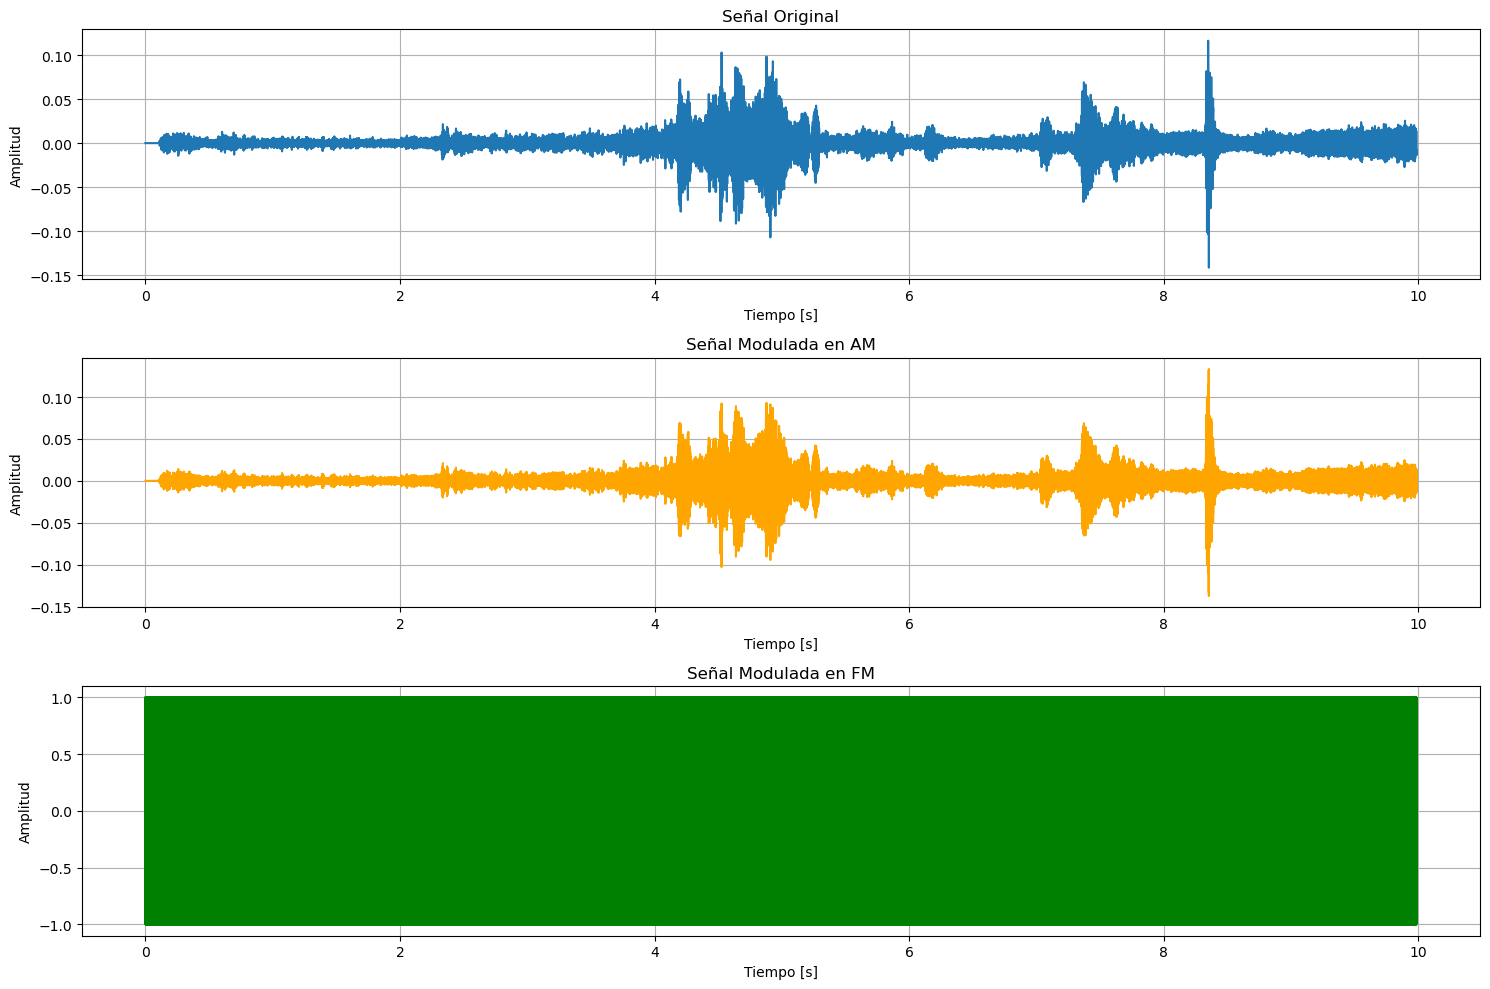

In [7]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Función para modular en AM
def am_modulate(audio, carrier_freq, sample_rate):
    carrier = np.cos(2 * np.pi * carrier_freq * np.arange(len(audio)) / sample_rate)
    modulated_signal = audio * carrier
    return modulated_signal

# Función para modular en FM
def fm_modulate(audio, carrier_freq, sample_rate, modulation_index=1.0):
    cumulative_audio = np.cumsum(audio) / sample_rate
    modulated_signal = np.cos(2 * np.pi * carrier_freq * np.arange(len(audio)) / sample_rate + modulation_index * cumulative_audio)
    return modulated_signal

# Cargar el archivo de audio
filename = 'Audio.wav'
audio, sample_rate = sf.read(filename)

# Parámetros de la portadora
carrier_freq = 10000  # Frecuencia de la portadora en Hz

# Modulación AM
am_signal = am_modulate(audio, carrier_freq, sample_rate)

# Modulación FM
fm_signal = fm_modulate(audio, carrier_freq, sample_rate)

# Crear un intervalo de tiempo para el gráfico
time = np.arange(len(audio)) / sample_rate

# Graficar las señales
plt.figure(figsize=(15, 10))

# Señal original
plt.subplot(3, 1, 1)
plt.plot(time, audio, label='Señal Original')
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()

# Señal AM
plt.subplot(3, 1, 2)
plt.plot(time, am_signal, label='Señal AM', color='orange')
plt.title('Señal Modulada en AM')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()

# Señal FM
plt.subplot(3, 1, 3)
plt.plot(time, fm_signal, label='Señal FM', color='green')
plt.title('Señal Modulada en FM')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Moduladora de audio

### (Los audios se guardan en la carpeta contenedora del codigo)

In [8]:
import numpy as np
import soundfile as sf
from scipy.signal import hilbert

# Función para modular en AM
def am_modulate(audio, carrier_freq, sample_rate):
    carrier = np.cos(2 * np.pi * carrier_freq * np.arange(len(audio)) / sample_rate)
    modulated_signal = audio * carrier
    return modulated_signal

# Función para modular en FM
def fm_modulate(audio, carrier_freq, sample_rate, modulation_index=1.0):
    cumulative_audio = np.cumsum(audio) / sample_rate
    modulated_signal = np.cos(2 * np.pi * carrier_freq * np.arange(len(audio)) / sample_rate + modulation_index * cumulative_audio)
    return modulated_signal

# Cargar el archivo de audio
filename = 'Audio.wav'
audio, sample_rate = sf.read(filename)

# Parámetros de la portadora
carrier_freq = 10000  # Frecuencia de la portadora en Hz

# Modulación AM
am_signal = am_modulate(audio, carrier_freq, sample_rate)
sf.write('am_modulated.wav', am_signal, sample_rate)

# Modulación FM
fm_signal = fm_modulate(audio, carrier_freq, sample_rate)
sf.write('fm_modulated.wav', fm_signal, sample_rate)

print("Modulación completada y guardada en archivos .wav")


Modulación completada y guardada en archivos .wav
